In [50]:
import sys
sys.path.append('/home/users/su8sy/lib/python/')

import numpy as np
import dask
import xarray as xr
import GriddedData
import time

In [2]:
#- Other modules
import os, sys
from glob import glob
import numpy.ma as ma
import scipy as sc
import WavenumberSpectrum as ws
import dask.array as da

### palette
from matplotlib.colors import LogNorm
import matplotlib.cm as mplcm
import colormaps as cmaps
import matplotlib.cm as cm
cm.register_cmap(name='viridis', cmap=cmaps.viridis)
import seaborn as sns
viri_cmap = cmaps.viridis # future default matplotlib
seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic

### quick plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
varcurlfile = '/fsnet/data/meom/MODEL_SET/NATL60/NATL60-MJM155-S/1d/CURLOVERF/varm1x1deg_L120_NATL60-MJM155_y2008m03.1d_CURLOVERF.nc'
varcurlds = xr.open_dataset(varcurlfile)

curlfile = '/srv/share/workdir81/su8sy/CURLOVERF/NATL60-MJM155_y2008m09.1d_CURLOVERF.nc'
curlds = xr.open_dataset(curlfile)

lpcurlfile = '/fsnet/data/meom/MODEL_SET/NATL60/NATL60-MJM155-S/1d/CURLOVERF/NATL60-MJM155_y2008m03.1d_CURLOVERF.ncL120'
lpcurlds = xr.open_dataset(lpcurlfile)

In [45]:
varrhofile = '/srv/share/workdir81/su8sy/BUOYANCYFLX/varm1x1deg_L120_NATL60-MJM155_y2008m09.1d_vosigma0.nc'
varrhods = xr.open_dataset(varrhofile)
varrho = varrhods['variance_vosigma0'][0]
print varrho.shape

(57, 90)


In [6]:
varsstfile = '/fsnet/data/meom/MODEL_SET/NATL60/NATL60-MJM155-S/1d/SPICYNESS/varm1x1deg_L120_NATL60-MJM155_y2008m03.1d_sosstsst.nc'
varsstds = xr.open_dataset(varsstfile)
varsst = varsstds['variance_sosst'][0]
print varsst.shape

(57, 90)


In [7]:
lpcurl= lpcurlds['socurloverf'][0]
navlat= lpcurlds['nav_lat']
navlon= lpcurlds['nav_lon']
print navlon.shape
print lpcurl.shape
cont1 = np.isnan(lpcurl)

(3454, 5422)
(3454, 5422)


In [46]:
varcurl = varcurlds['variance_socurloverf'][0]
print varcurl.shape
crsnavlon= varcurlds['nav_lon']
crsnavlat= varcurlds['nav_lat']
#print crsnavlon.shape
curl = curlds['socurloverf'][0]
navlat= curlds['nav_lat']
navlon= curlds['nav_lon']
#print navlon.shape
#print cont.shape

(57, 90)


In [9]:
cont1 = np.isnan(curl)
navlat= curlds['nav_lat']
navlon= curlds['nav_lon']

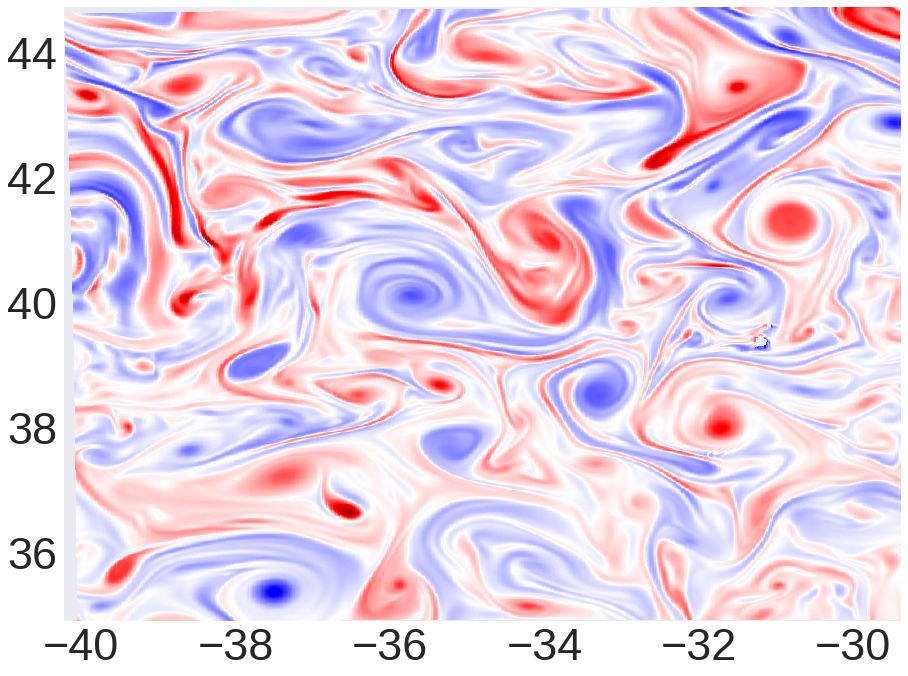

In [49]:
plt.figure(figsize=(15,11))
#plt.hold(True)
ax = plt.subplot(111)
#ax = plt.axes(projection=None)
ax.autoscale(tight=True)

pcolor = ax.pcolormesh(navlon[585:1335,2485:3125],navlat[585:1335,2485:3125],
    ma.masked_invalid(curl[585:1335,2485:3125]),cmap=div_cmap,vmin=-1,vmax=1,alpha=1)
ax.tick_params(labelsize=45)
#ax.contour(navlon,navlat,cont1,alpha=0.5,linewidth=0.000001,antialiased=True)
#ax.coastlines(resolution="10m",color='k')
#plt.colorbar(orientation='horizontal',pad=0.05)
#cbar = plt.colorbar(pcolor,orientation='horizontal',pad=0.15)
#cbar.ax.tick_params(labelsize=25)
#implot = ax.imshow(pcolor)
#ax.set_xlabel('Longitude (in degree)',fontsize=50)
#ax.set_ylabel('Latitude (in degree)',fontsize=50)

#filename = '/home/users/su8sy/Figures/leg_zoom10deg_sept_curl_cont.png'
#plt.savefig(filename,dpi=300,facecolor='w', edgecolor=None,bbox_inches='tight', pad_inches=0.1, rasterized=True)

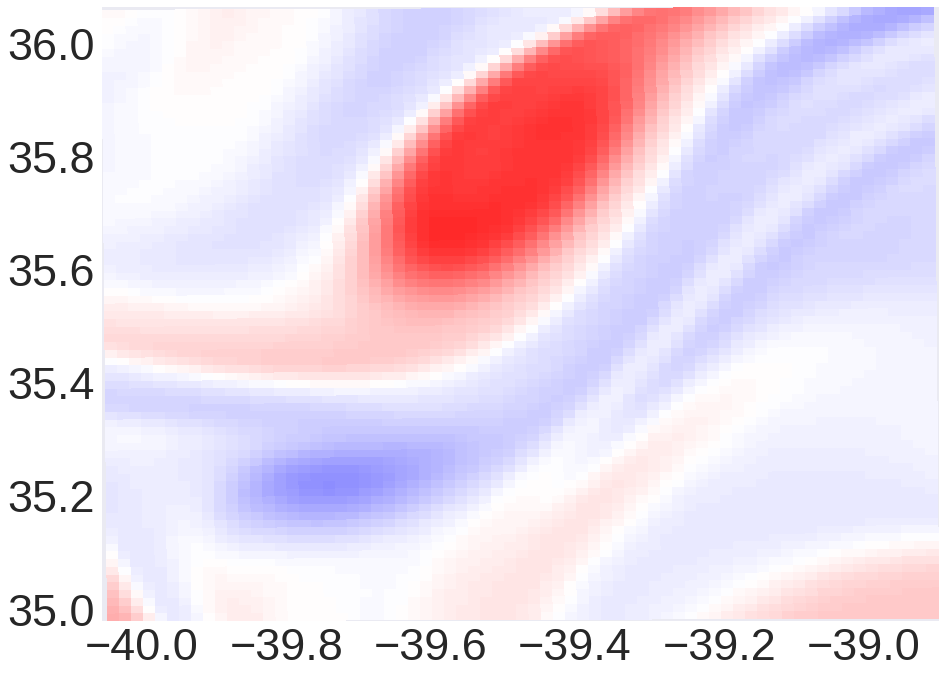

In [48]:
plt.figure(figsize=(15,11))
#plt.hold(True)
ax = plt.subplot(111)
#ax = plt.axes(projection=None)
ax.autoscale(tight=True)

pcolor = ax.pcolormesh(navlon[585:665,2485:2555],navlat[585:665,2485:2555],
    ma.masked_invalid(curl[585:665,2485:2555]),cmap=div_cmap,vmin=-1,vmax=1,alpha=1)
ax.tick_params(labelsize=45)
#ax.contour(navlon,navlat,cont1,alpha=0.5,linewidth=0.000001,antialiased=True)
#ax.coastlines(resolution="10m",color='k')
#plt.colorbar(orientation='horizontal',pad=0.05)
#cbar = plt.colorbar(pcolor,orientation='horizontal',pad=0.15)
#cbar.ax.tick_params(labelsize=25)
#implot = ax.imshow(pcolor)
#ax.set_xlabel('Longitude (in degree)',fontsize=50)
#ax.set_ylabel('Latitude (in degree)',fontsize=50)

#filename = '/home/users/su8sy/Figures/leg_zoom1deg_sept_curl_cont.png'
#plt.savefig(filename,dpi=300,facecolor='w', edgecolor=None,bbox_inches='tight', pad_inches=0.1, rasterized=True)

In [22]:
print navlon[600,1800].values
print navlon[600,2400].values
print navlat[600,1800].values
print navlat[1200,2400].values

-51.4825134277
-41.4683685303
35.1224555969
43.0191345215


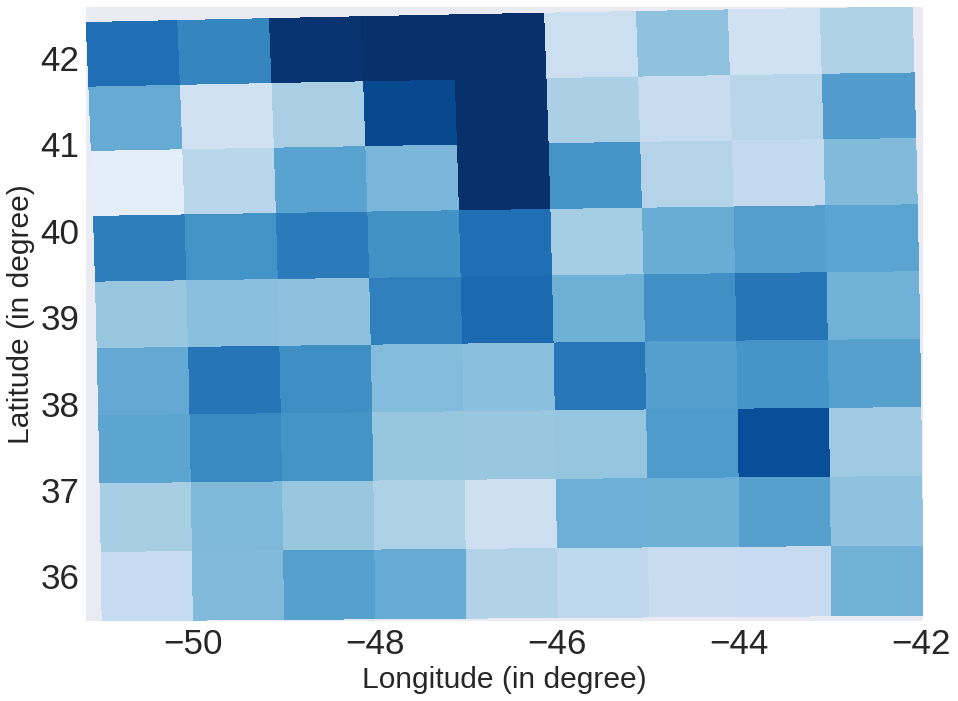

In [21]:
plt.figure(figsize=(15,11))
#plt.hold(True)
ax = plt.subplot(111)
#ax = plt.axes(projection=None)
ax.autoscale(tight=True)

pcolor = ax.pcolormesh(crsnavlon[10:20,30:40],crsnavlat[10:20,30:40],
    ma.masked_invalid(varcurl[10:20,30:40]),cmap=seq_cmap,vmin=0,vmax=0.1,alpha=1)
ax.tick_params(labelsize=35)
#ax.contour(navlon,navlat,cont1,alpha=0.5,linewidth=0.000001,antialiased=True)
#ax.coastlines(resolution="10m",color='k')
#plt.colorbar(orientation='horizontal',pad=0.05)
#cbar = plt.colorbar(pcolor,orientation='horizontal',pad=0.15)
#cbar.ax.tick_params(labelsize=25)
#implot = ax.imshow(pcolor)
ax.set_xlabel('Longitude (in degree)',fontsize=30)
ax.set_ylabel('Latitude (in degree)',fontsize=30)

filename = '/home/users/su8sy/Figures/leg_zoom_march_varcurl_cont.png'
plt.savefig(filename,dpi=300,facecolor='w', edgecolor=None,bbox_inches='tight', pad_inches=0.1, rasterized=True)

In [84]:
varcurlfile = '/fsnet/data/meom/MODEL_SET/NATL60/NATL60-MJM155-S/1d/CURLOVERF/varm1x1deg_L120_NATL60-MJM155_y2008m03.1d_CURLOVERF.nc'
varcurlds = xr.open_dataset(varcurlfile)
varcurl = varcurlds['variance_socurloverf'][0]

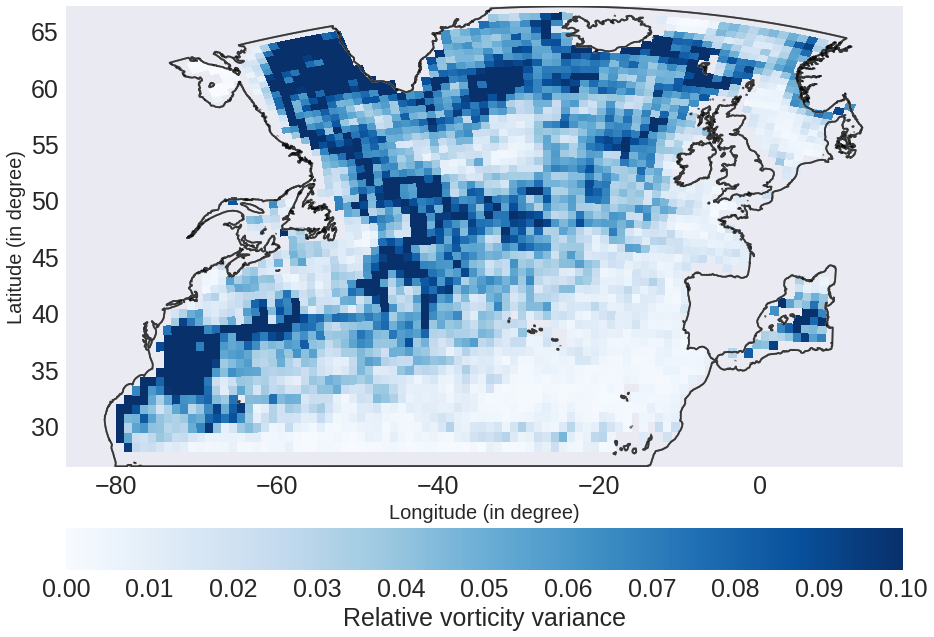

In [85]:
fig = plt.figure(figsize=(15,11))
#plt.hold(True)
ax = plt.subplot(111)
#ax = plt.axes(projection=None)
ax.autoscale(tight=True)

pcolor = ax.pcolormesh(crsnavlon,crsnavlat,
    ma.masked_invalid(varcurl),cmap=seq_cmap,vmin=0,vmax=0.1,alpha=1)
ax.tick_params(labelsize=25)
ax.contour(navlon,navlat,cont1,alpha=0.5,linewidth=0.000001,antialiased=True)
#ax.coastlines(resolution="10m",color='k')
#plt.colorbar(orientation='horizontal',pad=0.05)
cbar = plt.colorbar(pcolor,orientation='horizontal',pad=0.1)
cbar.ax.tick_params(labelsize=35)
#implot = ax.imshow(pcolor)
#ax.set_title('December',fontsize=30)
ax.set_xlabel('Longitude (in degree)',fontsize=20)
ax.set_ylabel('Latitude (in degree)',fontsize=20)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('Relative vorticity variance',fontsize=25)


#filename = '/home/users/su8sy/Figures/leg_varcurl_cont.png'
#plt.savefig(filename,dpi=300,facecolor='w', edgecolor=None,bbox_inches='tight', pad_inches=0.1, rasterized=True)

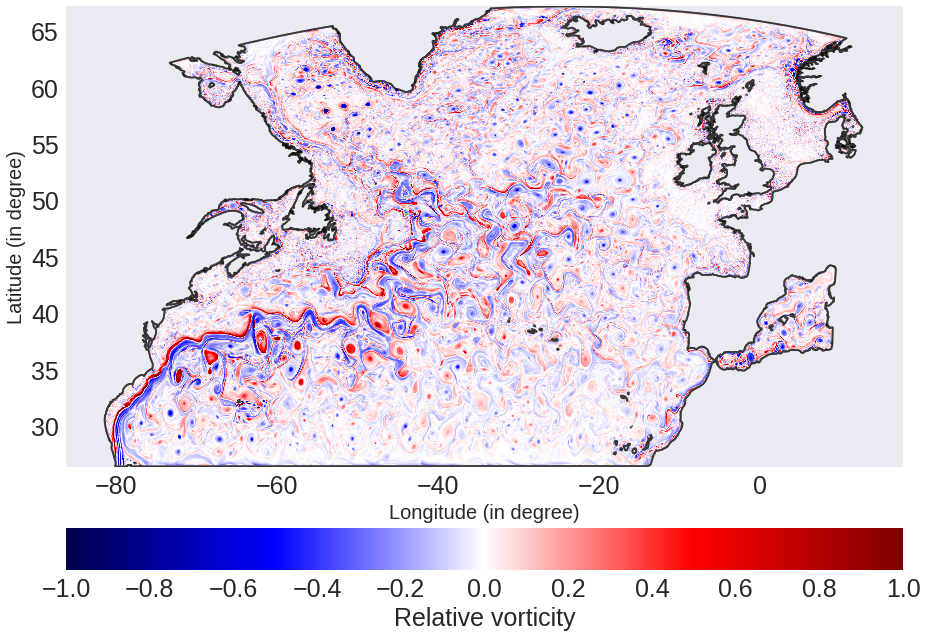

In [47]:
plt.figure(figsize=(15,11))
#plt.hold(True)
ax = plt.subplot(111)
#ax = plt.axes(projection=None)
ax.autoscale(tight=True)

pcolor = ax.pcolormesh(navlon,navlat,
    ma.masked_invalid(curl),cmap=div_cmap,vmin=-1,vmax=1,alpha=1)
ax.tick_params(labelsize=25)
ax.contour(navlon,navlat,cont1,alpha=0.5,linewidth=0.000001,antialiased=True)
#ax.coastlines(resolution="10m",color='k')
#plt.colorbar(orientation='horizontal',pad=0.05)
cbar = plt.colorbar(pcolor,orientation='horizontal',pad=0.1)
cbar.ax.tick_params(labelsize=35)
#implot = ax.imshow(pcolor)
ax.set_xlabel('Longitude (in degree)',fontsize=20)
ax.set_ylabel('Latitude (in degree)',fontsize=20)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('Relative vorticity',fontsize=25)

#filename = '/home/users/su8sy/Figures/leg_sept_curl_cont.png'
#plt.savefig(filename,dpi=300,facecolor='w', edgecolor=None,bbox_inches='tight', pad_inches=0.1, rasterized=True)